In [1]:
clc;
clear;


fileID = fopen('SPECTRAL.DAT', 'r'); 
SPECTRAL = textscan(fileID, '%f %f %f %f %f %f %f %f %f %f %f', 'HeaderLines', 3);
fclose(fileID);

%computational domain
%(Lx, Ly, Lz) = (2*pi*h, 2*h, pi*h)

NXH = 32; 
NY = 129; 
NZ = 64;

Re=2800;
N = length(SPECTRAL{1});

if N ~= NXH * NY * NZ
    error('数组大小与指定的三维数组大小不匹配');
end


 KX1 = reshape(SPECTRAL{1}, [NZ, NY, NXH]);
  Y1 = reshape(SPECTRAL{2}, [NZ, NY, NXH]);
 KZ1 = reshape(SPECTRAL{3}, [NZ, NY, NXH]);
 KX2 = KX1(1,1,:);
 KZ2 = KZ1(:,1,1);
 KXH = squeeze(KX2);
   Y = Y1(1,:,1)';
  KZ = squeeze(KZ2);


In [2]:
ReU = reshape(SPECTRAL{4}, [NZ, NY, NXH]);
ImU = reshape(SPECTRAL{5}, [NZ, NY, NXH]);
ReV = reshape(SPECTRAL{6}, [NZ, NY, NXH]);
ImV = reshape(SPECTRAL{7}, [NZ, NY, NXH]);
ReW = reshape(SPECTRAL{8}, [NZ, NY, NXH]);
ImW = reshape(SPECTRAL{9}, [NZ, NY, NXH]); 
ReP = reshape(SPECTRAL{10}, [NZ, NY, NXH]);
ImP = reshape(SPECTRAL{11}, [NZ, NY, NXH]);
U_Re = permute(ReU, [3, 2, 1]);
U_Im = permute(ImU, [3, 2, 1]);
V_Re = permute(ReV, [3, 2, 1]);
V_Im = permute(ImV, [3, 2, 1]);
W_Re = permute(ReW, [3, 2, 1]);
W_Im = permute(ImW, [3, 2, 1]);
P_Re = permute(ReP, [3, 2, 1]);
P_Im = permute(ImP, [3, 2, 1]);

In [3]:
u = U_Re + 1i * U_Im;
v = V_Re + 1i * V_Im;
w = W_Re + 1i * W_Im;

In [4]:
u_avg = mean(u, [1 3]);
v_avg = mean(v, [1 3]);
w_avg = mean(w, [1 3]);

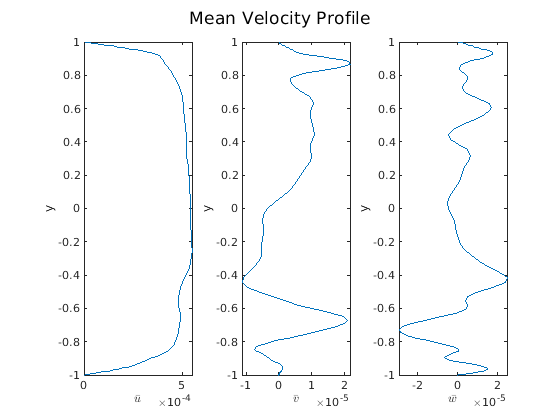

In [5]:
subplot(1, 3, 1)
plot(real(u_avg),Y)
xlabel('$\bar{u}$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 2)
plot(real(v_avg),Y)
xlabel('$\bar{v}$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 3)
plot(real(w_avg),Y)
xlabel('$\bar{w}$', 'Interpreter', 'latex')
ylabel('y')

figure1 = gcf;
sgtitle('Mean Velocity Profile','HorizontalAlignment', 'center');
print(figure1, 'Mean Velocity Profile_spe.png', '-dpng', '-r300');

In [30]:
u_turb = u - u_avg;
v_turb = v - v_avg;
w_turb = w - w_avg;
rey_uud = u_turb .* conj(u_turb);
rey_uvd = u_turb .* conj(v_turb);
rey_uwd = u_turb .* conj(w_turb);
rey_vwd = v_turb .* conj(w_turb);
rey_vvd = v_turb .* conj(v_turb);
rey_wwd = w_turb .* conj(w_turb);
rey_uu = real(mean(rey_uud, [1 3]));
rey_uv = real(mean(rey_uvd, [1 3]));
rey_uw = real(mean(rey_uwd, [1 3]));
rey_vw = real(mean(rey_vwd, [1 3]));
rey_vv = real(mean(rey_vvd, [1 3]));
rey_ww = real(mean(rey_wwd, [1 3]));

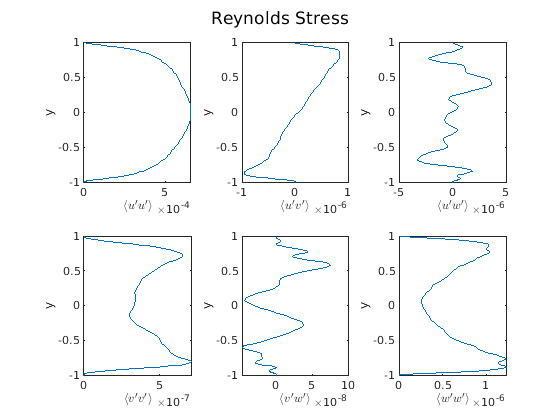

In [31]:
subplot(2, 3, 1)
plot(rey_uu,Y)
xlabel('$\langle{u''u''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 2)
plot(rey_uv,Y)
xlabel('$\langle{u''v''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 3)
plot(rey_uw,Y)
xlabel('$\langle{u''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 4)
plot(rey_vv,Y) 
xlabel('$\langle{v''v''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 5)
plot(rey_vw,Y)
xlabel('$\langle{v''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 6)
plot(rey_ww,Y)
xlabel('$\langle{w''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

figure2 = gcf;
sgtitle('Reynolds Stress','HorizontalAlignment', 'center');
print(figure2, 'Reynolds Stress_spe.png', '-dpng', '-r300');